<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Loading Images in Keras**


Estimated time needed: **45** minutes


<h1> CNN Training Pipeline </h1></s>


Convolutional neural networks (CNNs) have had great success in certain kinds of problems, such as image recognition. Data loading and preparation are important steps when it comes to working with such models. Increasingly, data augmentation is also required for more complex object recognition tasks. In this lab, we will discover various ways of loading images, as well as converting, augmenting and saving image datasets using the Keras API.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/images/cnn_image_loading_lab.drawio.png)


### What's a Digital Image?


A gray-scale digital image can be interpreted as a rectangular array of numbers. If we zoom into the region, we see the image is comprised of a rectangular grid of discrete blocks called pixels. We can represent these pixels with numbers called intensity values ranging from 0 to 255, as shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/Gray_scale_lana.png)


Color images are a combination of red, blue, and green intensity values as shown here


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/RGB_ape.png)


each channel has  values ranging from 0 to 255.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/RGB_array.png)


Finally, to apply a neural network to Karis we sometimes add a batch dimension, this is just  an extra dimension. Just think of the batch dimension as an address that contains an image array.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/batch_dim_images.png)


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
    </li>
    <li><a href="https://#Background">Objectives</a></li>
    <li>
        <a href="https://#Ways to load images">Ways to load images</a>
        <ol>
            <li><a href="https://#Ready-to-use toy datasets">Ready-to-use toy datasets</a></li>
            <li><a href="https://#Load individual images as PIL objects">Load individual images as PIL objects</a></li>
            <li><a href="https://#Load from directory of images">Load from directory of images</a></li>
            <li><a href="https://#Load image from URL">Load image from URL</a></li>
        </ol>
    </li>
</ol>


<h1 href="Objectives">Objectives</h1>

After completing this lab you will be able to **apply** Keras to:

*   Load and display images in multiple ways
*   Convert between array and PIL formats
*   Convert images to grayscale, augment images through transformations and save images to files


***


<h2 href="Setup">Setup</h2>


For this lab, we will be using the following libraries:

*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`Pillow`](https://pillow.readthedocs.io/en/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for image processing functions.
*   [`OpenCV`](https://docs.opencv.org/4.x/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for other image processing functions.
*   [`tensorflow`](https://www.tensorflow.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and neural network related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`keras`](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for building artificial neural networks.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!pip install numpy==1.22.3 matplotlib==3.5.1 tensorflow==2.9.0 opencv-python==4.5.5.62 keras

# Note: If your environment doesn't support "!mamba install", use "!pip install --user"

# RESTART YOUR KERNEL AFTERWARD AS WELL

In [2]:
!pip3 install --upgrade tensorflow

# RESTART YOUR KERNEL AFTERWARD AS WELL

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is inc

### Importing Required Libraries

*We recommend you import all required libraries in one place (here):*


In [3]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # tensorflow INFO and WARNING messages are not printed

In [4]:
# usage of *args, **kwargs
def function(a, b, *args, **kwargs):
    print(a)
    print(b)
    print(args) # tuple
    print(kwargs) # dictionary

function(3, 4, 3,1,5,6,"hal", name='Htet Aung Lynn')

3
4
(3, 1, 5, 6, 'hal')
{'name': 'Htet Aung Lynn'}


In [1]:
import random
import requests
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import PIL
import PIL.Image
from PIL import Image, ImageOps

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense
from keras import datasets
from keras.utils import image_dataset_from_directory

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img

%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

### Defining Helper Functions


In [6]:
# This function will allow us to visualize four sample images from the loaded
def visualize(features, labels):
    plt.rcParams['figure.figsize'] = (8, 4)

    for _ in range(4):
        plt.subplot(1, 4, _+1)
        num = random.randint(0, len(features))
        plt.imshow(features[num],
                cmap = 'gray',
                interpolation = 'none',
                vmin = 0,
                vmax = 255)

        plt.title('class {}'.format(labels[num]))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Background


Keras is an open-source Python library used for developing and evaluating deep learning models. It provides utilities for loading, preparing, converting, augmenting, and saving image data. In this lab, we will explore various ways of loading image datasets in Keras.


In [7]:
# Print tensorflow version
print(tf.__version__)

# Try !pip install --upgrade tensorflow if the version printed
# is less than 2.9.0

2.20.0


## Ways to load images


We will look into four main ways of using image datasets in Keras:

*   Loading in a ready-to-use toy dataset from [Keras](https://keras.io/api/datasets/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)
*   Loading individual images as PIL objects
*   Reading a directory of images on disk using `tf.keras.utils.image_dataset_from_directory`.
*   Loading image from URL


### A. Ready-to-use toy datasets


The `tf.keras.datasets` in Keras provide a few in-built image datasets that have been cleaned and are typically helpful in debugging models, or creating simple examples.

These include MNIST hand-written digits, Fashion MNIST, CIFAR10, and CIFAR100.


**MNIST hand-written digits** is a collection of 60,000 28x28 grayscale images belonging to 10 different classes, along with a test set of 10,000 images. Let us load in the MNIST hand-written digits dataset using the `load_data` function.


In [8]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

X_train is a uint8 numpy array of grayscale images with shapes (60000, 28, 28) from the training dataset. Its pixel values range from 0 to 255.

y_train is a uint8 numpy array of digit labels (integers in range 0-9) with shape (60000) for the training data.


In [9]:
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(y_train.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


Let's visualize four random images from the training set. Only one color channel is needed to display the image as a grayscale. So for this step, we take a single color channel and display the image using the `plt.imshow()` method with `cmap` set to `gray`, `vmin` set to 0, and `vmax` set to 255.


In [10]:
X_train[0].shape

(28, 28)

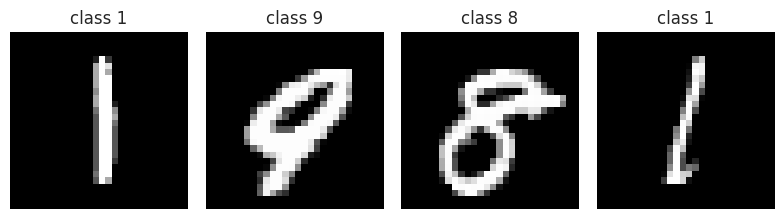

In [11]:
visualize(X_train, y_train)

#### Using image data with Autoencoders


As you will see in future labs, an autoencoder (AE) is a neural network where the input is the same as the output.  

To build an AE, you need three things:

* an encoding function
* a decoding function
* distance function between the amount of information loss between the compressed representation of your data and the decompressed representation, that is, a loss function

Some practical applications of AEs are data denoising and dimensionality reduction for data visualization.


We can define a size for our encoded representations, and use `Dense()` to create encoded representation of the input. Similarly, we can use `Dense()` to create lossy reconstructions of the input. As seen below, `encoded` has a shape of (None, 64) and `reconstruction` has the original input size of (None, 784).


In [12]:
ENCODING_DIM = 64

# Encoded representations
inputs = Input(shape=(784,))
encoded = Dense(ENCODING_DIM, activation='sigmoid')(inputs)

# Reconstructions
encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
reconstruction = Dense(784, activation='sigmoid')(encoded_inputs)

print("Encoded Input:", encoded.shape)
print("Reconstructed Input:", reconstruction.shape)

Encoded Input: (None, 64)
Reconstructed Input: (None, 784)


Using this technique, we can instantiate three types of models:

* End-to-end AEs mapping inputs to reconstructions
* An encoder mapping inputs to the latent space
* A decoder that takes in points from latent space and output corresponding reconstructed samples


### Exercise 1 - Load Fashion MNIST


**Fashion MNIST** is another collection of 60,000 28x28 grayscale images belonging to 10 different classes, along with a test set of 10,000 images. Write code to load the Fashion MNIST dataset using  `fashion_mnist.load_data()` from `keras.datasets`.


In [13]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

<details>
    <summary>Click here for solution</summary>

```python

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

```

</details>


X_train is a uint8 numpy array of grayscale images with shapes (60000, 28, 28) from the training dataset. Its pixel values range from 0 to 255.

y_train is a uint8 numpy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.


Now print the shape and dtype of the X_train and y_train arrays.


In [14]:
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(y_train.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


Display a few randomly selected images as grayscale using the `visualize()` helper function.


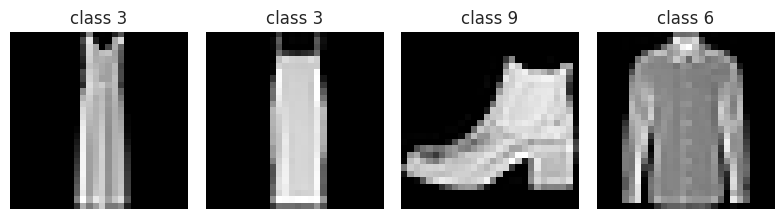

In [15]:
visualize(X_train, y_train)

<details><summary>Solution</summary>

```python
visualize(X_train)

```

</details>


**CIFAR10** is a collection of 50,000 32x32 color training images labeled over 10 different categories, along with a test set of 10,000 images.


In [16]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


X_train is a uint8 numpy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train is a uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.


In [17]:
print(X_train.shape)
print(X_train.dtype)

(50000, 32, 32, 3)
uint8


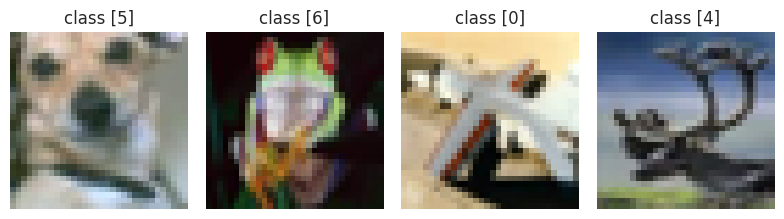

In [18]:
visualize(X_train, y_train)

**CIFAR100** is a collection of 50,000 32x32 color training images labeled over 100 fine-grained classes and 20 coarse-grained classes, along with a test set of 10,000 images. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (label) and a "coarse" label (superclass).


Using the fine `label_mode`:


In [19]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data(label_mode = 'fine')
# Two types of label_mode:
# 1. fine (100 classes)
# 2. coarse (20 classes)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [20]:
len(np.unique(y_test))

100

X_train is a uint8 numpy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train is a uint8 numpy array of labels (integers in range 0-99) with shape (50000, 1) for the training data.


In [21]:
print(X_train.shape)
print(X_train.dtype)

(50000, 32, 32, 3)
uint8


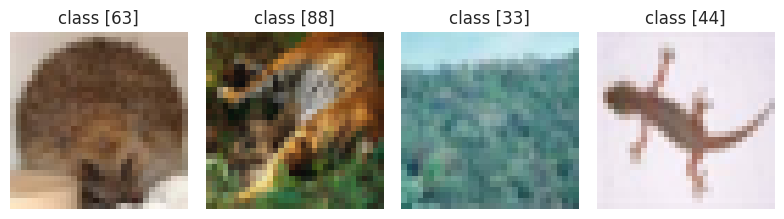

In [22]:
visualize(X_train, y_train)

### Exercise 2 - Load CIFAR100 with coarse label_mode


Load the CIFAR100 dataset by setting the pramter ```label_mode = 'coarse'``` in the ```load_data``` function .


In [23]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data(label_mode='coarse')

<details><summary>Solution</summary>

```python
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data(label_mode = 'coarse')

```

</details>


Visualize a few images from the training set using the `visualize()` helper function.


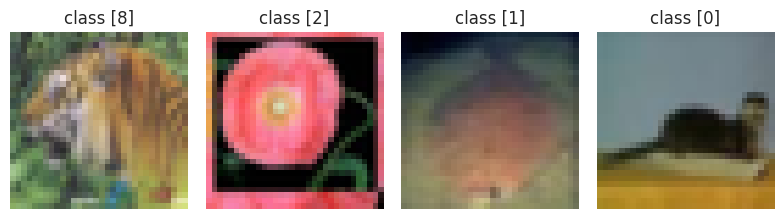

In [24]:
visualize(X_train, y_train)

<details><summary>Solution</summary>

```python
visualize(X_train)

```

</details>


### B. Load individual images as PIL objects


We will save the following image into our working environment.


In [25]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/Dog_Breeds.jpg'
filename = url.split('/')[-1] # split string until "/" backwards --> Dog_Breeds.jpg

r = requests.get(url, allow_redirects=True)
open(filename, 'wb').write(r.content)

70761

Next, we will specify a `target_size` of the image using a tuple of ints.


In [26]:
img_height, img_width = 100, 100

Using the path of the image we saved, we will use the `load_img` function to return a PIL Image instance.


In [27]:
gray_img = load_img(path = 'Dog_Breeds.jpg',
                    target_size = (img_height, img_width),
                    interpolation = 'nearest',
                    color_mode = 'grayscale')

color_img = load_img(path = 'Dog_Breeds.jpg',
                     target_size = (img_height, img_width),
                     interpolation = 'nearest',
                     color_mode = 'rgb')

print(type(gray_img))
print(type(color_img))

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


We can plot each image


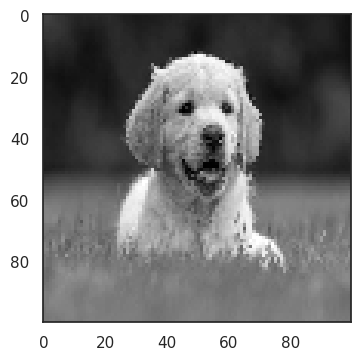

In [28]:
plt.imshow(gray_img, cmap="gray")
plt.show()

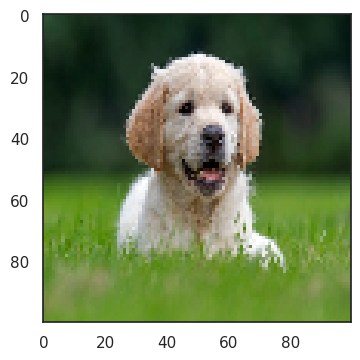

In [29]:
plt.imshow(color_img)
plt.show()

#### Converting an image


We can convert the PIL image to a 3D numpy array of pixel data, and a single image to a batch using the following code:


In [30]:
input_arr = img_to_array(color_img)
print("image shape",input_arr.shape)

image shape (100, 100, 3)


In [31]:
type(input_arr)

numpy.ndarray

We need to add the batch dimension before the using  Keras, we can add the batch dimension as follows:


In [32]:
# Convert single image to a batch
# input_arr_batch = np.array([input_arr]) # shape: (1, 100, 100, 3)
# input_arr.reshape(-1, input_arr.shape[0], input_arr.shape[1], input_arr.shape[2]).shape
input_arr_batch = np.expand_dims(input_arr, axis=0) # better to use

In [33]:
print("image shape plus batch dimension", input_arr_batch.shape)

image shape plus batch dimension (1, 100, 100, 3)


Similarly, we can convert a numpy array of pixel data back to an image.


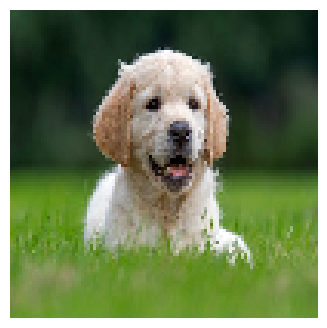

In [34]:
# Convert numpy array back to image
color_img = array_to_img(input_arr)
plt.imshow(color_img)
plt.axis('off')
plt.show()

#### Saving an image


In [35]:
save_img('dog_rgb_img.jpg', color_img)

### C. Load from directory of images


We can use the `ImageDataGenerator` class in Keras to load train, test, and validation datasets. This is especially useful when working with datasets containing several thousand or millions of images. More details on content provided in this sub-section can be found in the Tensorflow [documentation](https://www.tensorflow.org/tutorials/load_data/images?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01).


We will first load in our dataset of flowers, and then look at what we have.

The dataset has five types of flowers.

| Category | Flower       |
| -------- | ------------ |
| 0        | `Daisies`    |
| 1        | `Dandelions` |
| 2        | `Roses`      |
| 3        | `Sunflowers` |
| 4        | `Tulips`     |

Let's load the data and take a look.

Because the flower dataset is not one of the default small toy datasets available, we'll need to download it using the `keras.utils.get_file()` function.  
Note that you will only need to specify the first three arguments.

```python
keras.utils.get_file(
    fname=None,
    origin=None,
    untar=False,
    md5_hash=None,
    file_hash=None,
    cache_subdir='datasets',
    hash_algorithm='auto',
    extract=False,
    archive_format='auto',
    cache_dir=None
)
```


In [36]:
import pathlib
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/datasets/flower_photos.tgz"

# Download the data and track where it's saved using tf.keras.utils.get_file in a variable called data_dir
data_dir = keras.utils.get_file(origin = dataset_url,
                                   fname = 'flower_photos',
                                   untar = True)
data_dir = pathlib.Path(data_dir)

for folder in data_dir.glob('[!LICENSE]*'):
    print('The', folder.name, 'folder has', len(list(folder.glob('*.jpg'))), 'pictures')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count, 'total images')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
The flower_photos folder has 0 pictures
0 total images


In [37]:
import pathlib

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/datasets/flower_photos.tgz"

# Download the data and track where it's saved using tf.keras.utils.get_file in a variable called data_dir
data_dir = keras.utils.get_file(origin = url,
                                fname = 'flower_photos',
                                untar = True) # automatically extract
print(data_dir) # class --> 'string'
data_dir = pathlib.Path(data_dir)/'flower_photos' # path handling for any OS
print(data_dir) # class -> 'pathlib.PosixPath'

/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/flower_photos


In [38]:
data_dir.glob('[!LICENSE]*')

<generator object Path.glob at 0x7ab200625ad0>

In [39]:
for folder in data_dir.glob('[!LICENSE]*'): # not start with LICENSE
# Dataset has LICENSE.text file and skip it
    print('The', folder.name, 'folder has', len(list(folder.glob('*.jpg'))), 'pictures')
img_cnt = len(list(data_dir.glob('*/*.jpg')))
print(img_cnt, 'total images')

The dandelion folder has 898 pictures
The roses folder has 641 pictures
The tulips folder has 799 pictures
The sunflowers folder has 699 pictures
The daisy folder has 633 pictures
3670 total images


The files are stored in the following directory.

```python
flower_photos
    └── daisy
    └── dandelion
    └── roses
    └── sunflowers
    └── tulips

```


It seems there are a substantial amount of photos for each type of photo.

We can checkout some of the images below.


#### Visualizing images


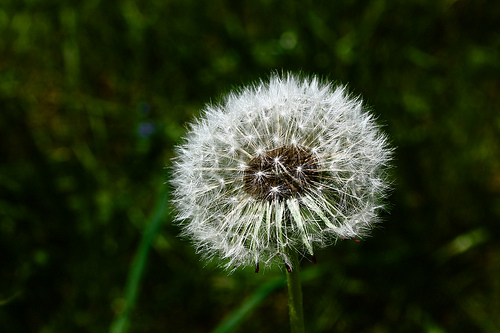

In [40]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[1]))

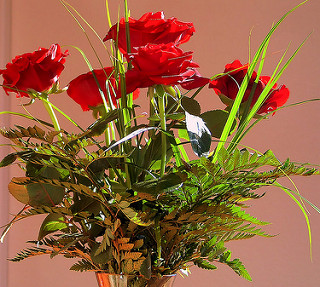

In [41]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

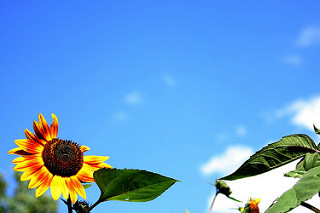

In [42]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[1]))

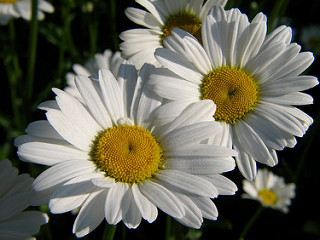

In [43]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[1]))

We can see that these photos are in various lighting conditions, framing, sizes, and zoom.


In [44]:
# The batch size simply specifies the number of images to pass through our neural network at a time,
# until the entire training set is passed through. 32 is the default
batch_size = 32

# Here we set the size of all the images to be 200x200
img_height = 200
img_width = 200

Here we split our images into training and validation sets using the `keras.utils.image_dataset_from_directory()` function.

*   Because our flower images are sorted into subfolders named after the type of flower, this method can automatically load in images and label them with the correct classes.
*   In order to plug these photos into our neural network as an input, we'll have to standardize the image sizes. We can do that with the `image_size` argument.


Let us use `image_dataset_from_directory` to load images off disk:


In [45]:
train_ds = image_dataset_from_directory(data_dir,
                                        validation_split = 0.2,
                                        subset = 'training',
                                        seed = 123,
                                        image_size = (img_height, img_width),
                                        batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


### Exercise 3 - Load validation set from the directory


Use the `image_dataset_from_directory` to load the validation set from the directory


In [46]:
# My code
vald_ds = image_dataset_from_directory(data_dir,
                                       validation_split = 0.2,
                                       subset = 'validation',
                                       seed = 123,
                                       image_size = (img_height, img_width),
                                       batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


<details><summary>Solution</summary>

```python
  validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

```

</details>


We can show the class names


In [47]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

Let's look at some sample rows from the dataset we loaded:


In [48]:
# `.take()` will take the first batch from a tensorflow dataset
# In our case it has taken the first 32 images due to batch_size = 32
first_batch = train_ds.take(1)
first_batch

<_TakeDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [49]:
np.arange(10), range(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), range(0, 10))

In [50]:
plt.figure(figsize = (25, 10))

for img, lbl in first_batch:
    print("class names:", lbl)
    # Let's look at the first 10 images
    for _ in np.arange(10):
        plt.subplot(2, 5, _ + 1)
        plt.imshow(img[_].numpy().astype('uint8'))
        plt.title(class_names[lbl[_]], size = 20, color='red')
        plt.axis('off')
    plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

We can see that after importing our images, they're all exactly square with `200 x 200` pixels.


#### Augmenting Images


Next, we will see how we can use `ImageDataGenerator` class to create tensor image data batches that have been augmented to have certain characteristics. Image data augmentation is useful in expanding the training dataset in order to improve the performance and ability of the model to generalize. Here are some ways in which we can augment images in our dataset:


*   **rescale**: rescaling factor
*   **rotation_range**: degree of random rotations of the images
*   **width_shift_range**: upper bound for random shift, either left or right
*   **height_shift_range**: upper bound for random shift, either up or down
*   **vertical_flip**: flip the image vertically


Further details on these options can be found in the Tensorflow [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01).


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
img_gen = ImageDataGenerator(rescale = 1.0/ 255,
                             rotation_range = 20,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             vertical_flip = True)

flowers_data = img_gen.flow_from_directory(data_dir)
type(flowers_data)

Found 3670 images belonging to 5 classes.


keras.src.legacy.preprocessing.image.DirectoryIterator

In [53]:
# Iterates images and labels from flowers data object
image, labels = next(flowers_data)
image.shape, labels.shape

((32, 256, 256, 3), (32, 5))

### Exercise 4 - Visualizing augmented images


Visualize 10 images from the augmented tensor image data batch.


In [55]:
dir(flowers_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_set_index_array',
 '_warn_if_super_not_called',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'max_queue_size',
 'n',
 'num_batches',
 'num_classes',
 'on_epoch_be

In [64]:
# Keep the index if the value in 'each_item' is non-zero
print(labels[0])
index = [index for index, each_item in enumerate(labels[0]) if each_item]
index[0]

[0. 0. 0. 1. 0.]


3

In [56]:
flowers_data.class_indices.keys()

dict_keys(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'])

In [65]:
list(flowers_data.class_indices.keys())[index[0]]

'sunflowers'

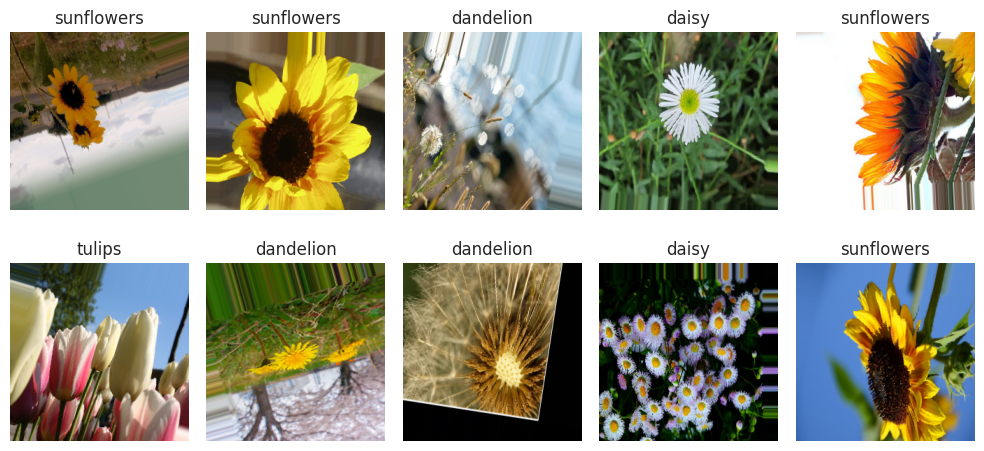

In [57]:
 plt.figure(figsize=(10,5))

for i in np.arange(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(image[i])
    index = [index for index, each_item in enumerate(labels[i]) if each_item]
    plt.title(list(flowers_data.class_indices.keys())[index[0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

<details><summary>Solution</summary>

```python
plt.figure(figsize=(25, 10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    index = [index for index, each_item in enumerate(labels[i]) if each_item]
    plt.title(list(flowers_data.class_indices.keys())[index[0]])
    plt.axis("off")
    
```

</details>


### D. Load image from URL


In the _Load individual images as PIL objects section_, we saw how we can download images to our working directory and, using the path of the image we saved, use the `load_img` function to return a PIL Image instance.


We can use custom functions like the one below to load images from a URL. This function was  borrowed from [statsmaths](https://statsmaths.github.io/stat289-f18/solutions/tutorial28-keras-images.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01).


In [2]:
def load_image(link, target_size=None):
    import requests
    import shutil
    import os
    _, ext = os.path.splitext(link) # split file name (path) and extension
    r = requests.get(link, stream=True) # downloaded "Dog_Breeds.jpg"
    # with open('temp' + ext, 'wb') as f:
    #     r.raw.decode_content =True
    #     shutil.copyfileobj(r.raw, f)
    img = load_img('temp.' + ext, target_size=target_size)

    return img_to_array(img)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

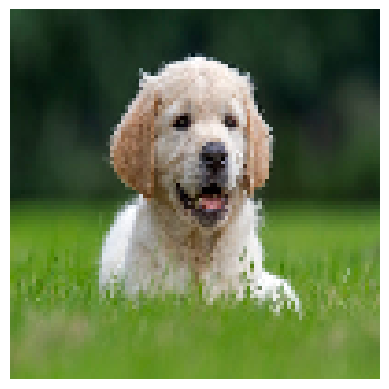

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/Dog_Breeds.jpg'

img = load_image(url, target_size=(100, 100))
plt.imshow(img/255)
plt.axis('off')

## Authors


[Kopal Garg](https://www.linkedin.com/in/gargkopal/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)


Kopal Garg is a Masters student in Computer Science at the University of Toronto.


### Other Contributors


[Richard Ye](https://linkedin.com/in/richard-ye?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01), [Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description |
| ----------------- | ------- | ----------- | ------------------ |
| 2022-05-23        | 0.1     | Kopal Garg  | Created Lab        |
| 2022-05-23        | 0.1     | Richard Ye  | Load from directory of images        |
| 2022-05-30        | 0.1     | Roxanne Li  | Review and edit content|
| 2022-07-19        | 0.1     | Steve Hord  | QA pass |


Copyright © 2022 IBM Corporation. All rights reserved.
